# Tarea/Examen 2

A continuación están las instrucciones para cada uno de los ejercicios de su siguiente evaluación.

Recuerden leer **muy** bien todo lo que se les pide.

Pueden usar documentación externa para resolver algún problema, pero en todo caso tienen que explicar qué es lo que está haciendo esa solución o de dónde la obtuvieron.

El código debe de estar debidamente comentado, indicando qué es lo que están haciendo.

Recuerden las buenas prácticas al momento de nombrar variables.

Recuerden cómo es que deben de presentar una buena gráfica.

# Ejercicio 1: Esperanza de vida y mortalidad infantil en el mundo

Utilizando la base de datos proporcionada ["Datos_Poblacion.csv"](https://drive.google.com/file/d/1ViP8voSIFgtnk7g3x1QNYyOYeRN6iwhQ/view?usp=sharing), realice lo siguiente:


1.   Obtenga un gráfico de barras en donde muestre el total de la población por continente. Adicionalmente sobre cada barra deberán mostrar el valor teórico de la mortalidad infantil que tiene cada continente, para ello noten lo siguiente: la mortalidad infantil se define como el total de defunciones de menores de un año de vida, por cada 1,000 nacidos vivos. Suponiendo que tienen una población total de 5800 y una tasa de mortalidad de 5.2. El valor teórico de la tasa de mortalidad para esa población sería de 30.16.

2.   En general se considera que hay que buscar tener una mortalidad infantil menor a 5, mientras que, tener una mortalidad infantil por arriba de 85 puede ser indicativo de un problema. Encuentren qué países por continente tienen una mortalidad infantil por debajo y por arriba de 5 y 85 respectivamente. Posteriormente hagan un scatter plot donde comparen la mortalidad infantil vs la esperanza de vida de cada uno de los países que encontraron.
Nota: Deben de plotearlo de tal manera que si hay algún contienente que tenga países que cumplen ambas características se puedan diferenciar, apóyense de los markers colores etc.

Discutan el significado de sus gráficas, ¿Qué continente podría tener un problema?



In [ ]:
#importar paqueterias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Leer el archivo con  y crear un dataframe
poblacion = pd.read_csv('Datos_Poblacion.csv')
poblacion

,Unnamed: 0,Country Code,Country,Continent,Population,Infant mortality,Life Expectancy
0,0,DZA,Algeria,Africa,40606052,31.00,76.8
1,1,AGO,Angola,Africa,28813463,191.19,56.0
2,2,BEN,Benin,Africa,10872298,85.00,61.9
3,3,BWA,Botswana,Africa,2250260,54.58,54.5
4,4,BFA,Burkina Faso,Africa,18646433,97.57,55.5
...,...,...,...,...,...,...,...
211,211,PRY,Paraguay,America,6725308,25.63,77.2
212,212,PER,Peru,America,31773839,31.94,73.7
213,213,SUR,Suriname,America,558368,23.57,72.2
214,214,URY,Uruguay,America,3444006,11.95,77.2


In [ ]:
#Agrupar los datos por continente
continentes = poblacion.groupby('Continent')
#Sumar la poblacion de cada pais del cada continente
pcont = continentes.Population.sum()
#mortalidad infantil teorica
mort = continentes.Population.sum()/continentes['Infant mortality'].sum()
mort= round(mort)
mort

Continent
Africa      294958.0
America    1112028.0
Asia       2519894.0
Europe     1172470.0
Oceania     104529.0
dtype: float64

/tmp/ipykernel_237/1503095407.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text( i , pcont[i] , n, ha='center', va='bottom')


0 294958.0
1 1112028.0
2 2519894.0
3 1172470.0
4 104529.0


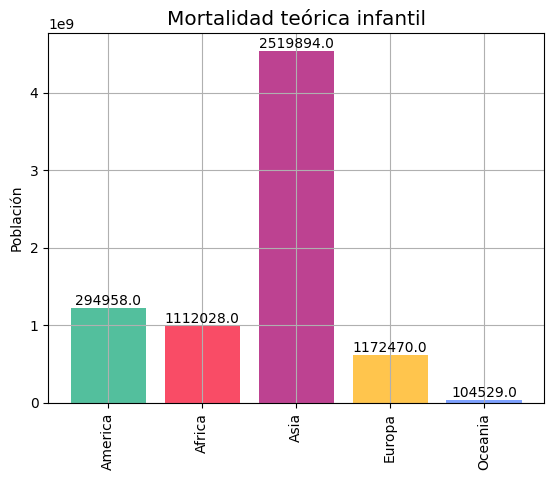

In [ ]:
#Graficar
colores = ['#53BF9D','#F94C66','#BD4291','#FFC54D','#7EA1FF']
cont = ['America','Africa','Asia','Europa','Oceania']
ax = plt.axes()
plt.bar(cont,pcont, color = colores,)

plt.style.use("ggplot")
#formato de gráfica
plt.title('Mortalidad teórica infantil')
plt.ylabel('Población')
plt.xticks(rotation = 90)
plt.grid(True)
#agregar mortalidad teorica a la gráfica
for i,n in enumerate(mort):
    ax.text( i , pcont[i] , n, ha='center', va='bottom')
    print(i,n)

/tmp/ipykernel_237/507062733.py:14: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  twin_axes.scatter(paises, le,marker = "x", color = 'green',label = 'Expectativa de vida',edgecolors = "blue",linewidths = 0.3)


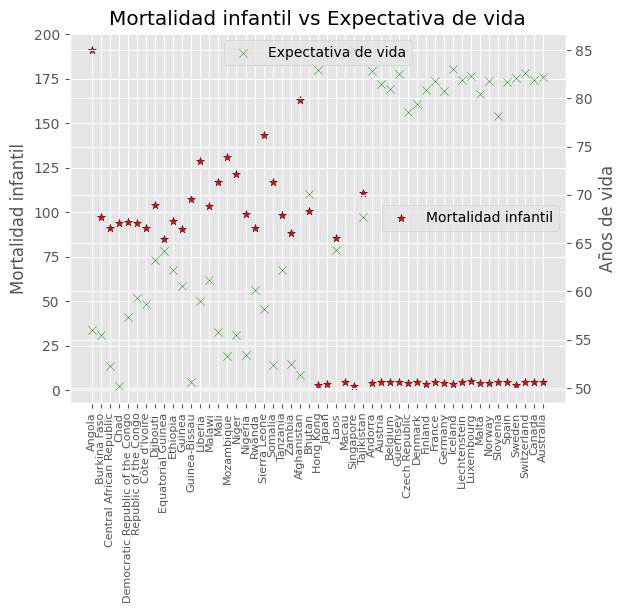

In [ ]:
#Seleccionar los los paises con los indices de mortalidad infatinles bajos y altos
infmort = poblacion[(poblacion['Infant mortality']>85)|(poblacion['Infant mortality']<5)]
#infmort
paises = np.array(infmort['Country'])
im = np.array(infmort['Infant mortality'])
le = np.array(infmort['Life Expectancy'])

fig, axes = plt.subplots()
axes.scatter(paises,im,marker = "*", label = 'Mortalidad infantil', color = 'red',edgecolors = "black",linewidths = 0.3)
axes.set_ylabel('Mortalidad infantil')
plt.xticks(rotation = 90,fontsize=8)
twin_axes = axes.twinx()
axes.legend(loc='center right')
twin_axes.scatter(paises, le,marker = "x", color = 'green',label = 'Expectativa de vida',edgecolors = "blue",linewidths = 0.3)
twin_axes.set_ylabel('Años de vida' )
#twin_axes.legend(loc='center right')
plt.title('Mortalidad infantil vs Expectativa de vida')
plt.legend(loc='upper center')

# Ejercicio 2: El PM

Considere la base de datos para material particulado en el archivo [aquí](https://drive.google.com/file/d/1YuZOLynFKIwDdu_Qog96ApgqICqWQPg5/view?usp=sharing). Esta base de datos fue obtenida, procesada y limpiada a partir de los datos disponibles en:[ http://www.aire.cdmx.gob.mx/default.php](http://www.aire.cdmx.gob.mx/default.php). Utilizando esta base datos calcule,

1. Las 3 estaciones con peores niveles promedio de PM2.5.
2. El mes del año con los peores niveles promedio de PM2.5.

Luego haga las siguientes gráficas:

1. Gráfico de barras mostrando los niveles promedio por estación y muestre la desviación estándar de los datos de cada estación como barras de error.
2. Gráfico de línea del ciclo anual de PM2.5. Es decir, una gráfica del promedio de PM2.5 por mes, con los meses en el eje de las "x" y las concentraciones promedio en el eje de las "y".
3. Gráfico de bigote para la distribución de observaciones de PM2.5 correspondiente a cada año en la base de datos. Un "bigote" para cada año mostrando la mediana, distancia interquartil, extremos, etc., de cada año en la base de datos.



In [ ]:
#Cargar los datos
pm = pd.read_csv('PM2.5_1986-2022.csv')
pm

,Unnamed: 0,Date,cve_station,value,id_station
0,0,2003-08-01 01:00:00,MER,17.0,NaN
1,1,2003-08-01 01:00:00,TLA,20.0,NaN
2,2,2003-08-01 01:00:00,COY,17.0,NaN
3,3,2003-08-01 01:00:00,UIZ,26.0,NaN
4,4,2003-08-01 01:00:00,SJA,24.0,NaN
...,...,...,...,...,...
201990,201990,2006-10-17 08:00:00,COY,11.0,NaN
201991,201991,2006-10-17 08:00:00,UIZ,6.0,NaN
201992,201992,2006-10-17 08:00:00,SJA,6.0,NaN
201993,201993,2006-10-17 08:00:00,SAG,13.0,NaN


In [ ]:
#agrupar por estacion y sacar el promedio de las mediciones
est = pm.groupby('cve_station')
std = est['value'].std()
est = est['value'].mean()
est = pd.DataFrame(est)
est = est.sort_values('value',ascending = [False])
print('Estaciones donde se midio mayor material particulado \n',est[0:3])

Estaciones donde se midio mayor material particulado 
                  value
cve_station           
PER          30.725108
MER          30.722129
TLA          30.169518


In [ ]:
fechas = pd.to_datetime(pm.Date[0:201994])
fechas
pm['Fecha'] = fechas
meses = pd.DatetimeIndex(pm['Fecha']).month
pm['mes'] = meses
prom_men = pm.groupby('mes')
prom_men = prom_men['value'].mean()
df_men = pd.DataFrame(prom_men)
df_men_ord = df_men.sort_values('value',ascending = [False])
print('El mes de mayor concentracion de PM es Diciembre\n',df_men_ord)

El mes de mayor concentracion de PM es Diciembre
           value
mes            
12.0  41.576773
1.0   37.698398
4.0   32.494983
5.0   32.190286
2.0   31.210416
11.0  30.244538
3.0   29.879551
6.0   23.565874
10.0  23.139996
8.0   21.010934
9.0   20.452178
7.0   19.287292


In [ ]:
std

cve_station
CAM    18.731907
COY    17.978871
MER    20.543285
PER    26.479354
SAG    17.989280
SJA    19.906785
TLA    18.579731
UIZ    19.462854
Name: value, dtype: float64

Text(0, 0.5, 'PM 2.5 (ppm)')

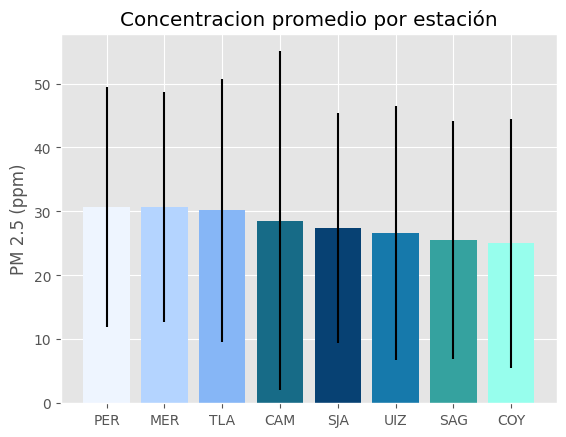

In [ ]:
est
estaciones = est.index
estaciones
prom_est = est.value
col = ['#EEF5FF','#B4D4FF','#86B6F6','#176B87','#074173','#1679AB','#35A29F',
'#97FEED']
plt.bar(estaciones,prom_est, color = col, yerr = std, ecolor = 'black'  )
plt.title('Concentracion promedio por estación')
plt.ylabel('PM 2.5 (ppm)')

          value
mes            
1.0   37.698398
2.0   31.210416
3.0   29.879551
4.0   32.494983
5.0   32.190286
6.0   23.565874
7.0   19.287292
8.0   21.010934
9.0   20.452178
10.0  23.139996
11.0  30.244538
12.0  41.576773


Text(0, 0.5, 'PM(ppm)')

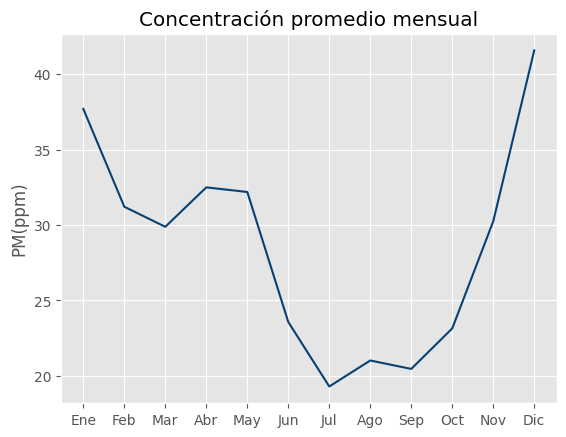

In [ ]:
print(df_men)
mes = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
prom_mensual = df_men.value
#col = ['#EEF5FF','#B4D4FF','#86B6F6','#176B87','#074173','#1679AB','#35A29F','#97FEED']
plt.plot(mes,prom_mensual, color = '#074173' )
plt.title('Concentración promedio mensual')
plt.ylabel('PM(ppm)')

Text(0, 0.5, 'PM 2.5 (ppm)')

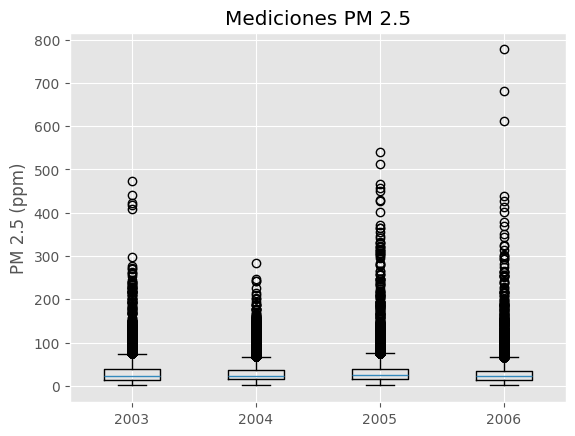

In [ ]:
años = pd.DatetimeIndex(pm['Fecha']).year
pm['año'] = años
prom_año = pm.groupby('año')
prom_año = prom_año['value'].mean()
df_año = pd.DataFrame(prom_año)
a03 = pm[pm['año']==2003]
a04 = pm[pm['año']==2004]
a05 = pm[pm['año']==2005]
a06 = pm[pm['año']==2006]
m3 = a03['value']
m4 = a04['value']
m5 = a05['value']
m6 = a06['value']
datos = [m3,m4,m5,m6]
fig, ax =  plt.subplots()
plt.boxplot(datos)
ax.set_xticklabels(['2003', '2004',
                    '2005', '2006'])
plt.title('Mediciones PM 2.5')
plt.ylabel('PM 2.5 (ppm)')

# Ejercicio 3: La SST cerca de México

Utilizando la base de datos de HadSST, disponible desde el repositorio:

1. Haga un recorte apropiado para encontrar los datos que se encuentren en la vecindad cercana a el  área del Golfo de México, el mar Caribe, el Golfo de California y el Pacífico Este, o la vecindad del territorio mexicano. Justifique su respuesta.
2. Grafique una serie de tiempo de la temperatura superficial del mar promedio, considerando únicamente los datos dentro del recuadro que escogió. Su serie de tiempo debe ser en escala anual, desde 1900 hasta 2023.
3. Grafique 4 mapas para el promedio estacional de SST en el Golfo. 4 mapas promedio en el Golfo de México, uno para cada estación del año. Por ejemplo, para la estación de primavera (Marzo-Abril-Mayo) calcule el promedio de SST en esos meses y grafique el mapa resultante. Sólo considere el período 1979-2019.

In [ ]:
pip install xarray

  Using cached xarray-2024.3.0-py3-none-any.whl.metadata (11 kB)
Using cached xarray-2024.3.0-py3-none-any.whl (1.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install h5netcdf

  Using cached h5netcdf-1.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.3.0-py3-none-any.whl (43 kB)
Using cached h5py-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# abrimos el dataset
ds=xr.open_dataset('HadSST.4.0.1.0_median.nc')
ds

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 2090, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-0...
  * latitude        (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 576B -177.5 -172.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tos             (time, latitude, longitude) float32 22MB ...
    time_bnds       (time, bnds) datetime64[ns] 33kB ...
    latitude_bnds   (latitude, bnds) float64 576B ...
    longitude_bnds  (longitude, bnds) float64 1kB ...
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7

In [ ]:
ds.variables

sst=ds['tos']
sst

<xarray.DataArray 'tos' (time: 2090, latitude: 36, longitude: 72)> Size: 22MB
[5417280 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-02-15T...
  * latitude   (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float64 576B -177.5 -172.5 -167.5 ... 172.5 177.5
Attributes:
    standard_name:  sea_water_temperature_anomaly
    long_name:      Sea water temperature anomaly at a depth of 20cm
    units:          K
    cell_methods:   area: mean (interval: 5.0 degrees_north 5.0 degrees_east)...

In [ ]:
lon = sst.where((sst.longitude > 10) & (sst.longitude < 35), drop=True)
lon

<xarray.DataArray 'tos' (time: 2090, latitude: 36, longitude: 5)> Size: 2MB
array([[[        nan,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan],
        ...,
        [        nan,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan]],

       [[        nan,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan],
...
        [ 1.3885955 ,         nan,         nan,  0.15543619,
          0.07362969],
        [        nan,  2.0930347 ,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan]],

       [[        nan,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan],
        ...,
        [ 2.1786861 ,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan],
        [        nan,         nan,         nan,         nan,
                 nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-02-15T...
  * latitude   (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float64 40B 12.5 17.5 22.5 27.5 32.5
Attributes:
    standard_name:  sea_water_temperature_anomaly
    long_name:      Sea water temperature anomaly at a depth of 20cm
    units:          K
    cell_methods:   area: mean (interval: 5.0 degrees_north 5.0 degrees_east)...

In [ ]:
la = sst.where((sst.latitude > -105) & (sst.latitude < -70), drop=True)
la

<xarray.DataArray 'tos' (time: 2090, latitude: 4, longitude: 72)> Size: 2MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,  0.43653607,
                 nan, -1.5194697 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.47911143,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.84703577,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.90401053,
         -0.69790274, -0.87430036],
        [        nan,         nan,         nan, ..., -0.8024822 ,
         -0.4691062 ,         nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-02-15T...
  * latitude   (latitude) float64 32B -87.5 -82.5 -77.5 -72.5
  * longitude  (longitude) float64 576B -177.5 -172.5 -167.5 ... 172.5 177.5
Attributes:
    standard_name:  sea_water_temperature_anomaly
    long_name:      Sea water temperature anomaly at a depth of 20cm
    units:          K
    cell_methods:   area: mean (interval: 5.0 degrees_north 5.0 degrees_east)...

In [ ]:
# Definimos los límites geográficos de interés respecto a la cercanía a el área del Golfo de México, el mar Caribe, el Golfo de California y el Pacífico Este
lon = slice(-105, -70)
lat = slice(10,35)
#Realizamos el recorte
ds_r = ds.sel(longitude= lon, latitude=lat)

print(ds_r)


<xarray.Dataset> Size: 343kB
Dimensions:         (time: 2090, latitude: 5, longitude: 7, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-0...
  * latitude        (latitude) float64 40B 12.5 17.5 22.5 27.5 32.5
  * longitude       (longitude) float64 56B -102.5 -97.5 -92.5 ... -77.5 -72.5
Dimensions without coordinates: bnds
Data variables:
    tos             (time, latitude, longitude) float32 293kB ...
    time_bnds       (time, bnds) datetime64[ns] 33kB ...
    latitude_bnds   (latitude, bnds) float64 80B ...
    longitude_bnds  (longitude, bnds) float64 112B ...
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7


In [ ]:
# Calculamos la media a lo largo de las dimensiones 'lon' y 'lat' para obtener la temperatura superficial del mar promedio
sst_p = ds_r.mean(dim=['longitude', 'latitude'])

# Seleccionamos el rango de tiempo desde 1900 hasta 2023
sst_p_r = sst_p.sel(time=slice('1900', '2023'))



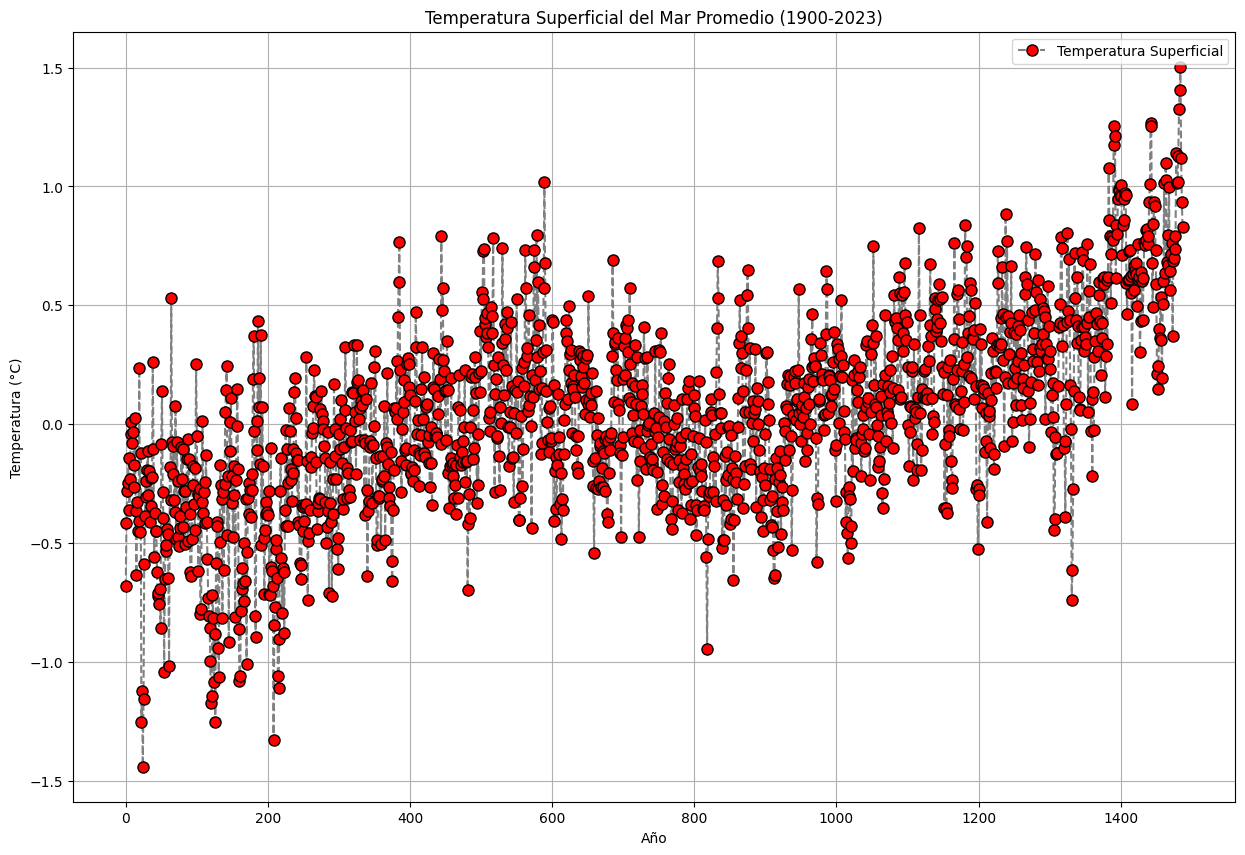

In [ ]:
# Graficamos la serie de tiempo
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(sst_p_r['tos'],color='grey', linestyle='--', marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black' )
plt.title('Temperatura Superficial del Mar Promedio (1900-2023)')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend(["Temperatura Superficial"])
plt.grid(True)
plt.show()


In [ ]:
# Definimos los límites geográficos del Golfo
lon1 = slice(-100, -80)
lat1 = slice(20,30)
#Realizamos el recorte con respecto al Golfo
ds_r_golfo = ds.sel(longitude= lon1, latitude=lat1)

print(ds_r_golfo)

<xarray.Dataset> Size: 117kB
Dimensions:         (time: 2090, latitude: 2, longitude: 4, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-0...
  * latitude        (latitude) float64 16B 22.5 27.5
  * longitude       (longitude) float64 32B -97.5 -92.5 -87.5 -82.5
Dimensions without coordinates: bnds
Data variables:
    tos             (time, latitude, longitude) float32 67kB nan nan ... -0.5611
    time_bnds       (time, bnds) datetime64[ns] 33kB ...
    latitude_bnds   (latitude, bnds) float64 32B ...
    longitude_bnds  (longitude, bnds) float64 64B ...
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7


In [ ]:
# Tomamos solamente el período de tiempo (1979-2019)
ds_r_golfo_t = ds_r_golfo.sel(time=slice('1979', '2019'))


In [ ]:
# Definimos las estaciones
#Primavera: Marzo, Abril, Mayo / Verano: Junio, Julio, Agosto / Otoño: Septiembre, Octubre, Noviembre / Invierno: Diciembre, Enero, Febrero, los números corresponden al número de cada mes
est = {
    'Primavera': [3, 4, 5],
    'Verano': [6, 7, 8],
    'Otoño': [9, 10, 11],
    'Invierno': [12, 1, 2]
}
#Se realizan recortes para cada estación
primavera = ds_r_golfo_t.sel(time=(ds_r_golfo_t['time.month'] >= 3) & (ds_r_golfo_t['time.month'] <= 5)).mean('time')
verano = ds_r_golfo_t.sel(time=(ds_r_golfo_t['time.month'] >= 6) & (ds_r_golfo_t['time.month'] <= 8)).mean('time')
otoño = ds_r_golfo_t.sel(time=(ds_r_golfo_t['time.month'] >= 9) & (ds_r_golfo_t['time.month'] <= 11)).mean('time')
invierno = ds_r_golfo_t.sel(time=((ds_r_golfo_t['time.month'] == 12) | (ds_r_golfo_t['time.month'] <= 2)) & (ds_r_golfo_t['time.month'] >= 1)).mean('time')

## Ejercicio 4: Trayectorias de ciclones

Utilizando la base de datos [IBTrACS](https://www.ncei.noaa.gov/products/international-best-track-archive), disponible en este [link](https://drive.google.com/file/d/1BBpYszGEUuBjXRDdWN_Fly_tEt4VGRA0/view?usp=drive_link) grafique en un mapa las trayectorias siguientes en mapas:

1. 1 trayectoria de un ciclón ocurrido en el Pacífico Oeste en el año de 2020.
2. La trayectoria de los ciclones Norma y Otis de 2023.


Extra: Indique en colores la intensidad de los ciclones en cada punto de la trayectoria.

In [ ]:
pip install  h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
ci = pd.read_csv('ibtracs_2019-2023.csv')
ci

,Unnamed: 0,ISO_TIME,USA_WIND,SID,NAME,BASIN,USA_LAT,USA_LON
0,686313,2019-01-01 00:00:00,45.0,2018362S13147,PENNY,SP,-12.7000,141.100
1,686314,2019-01-01 03:00:00,45.0,2018362S13147,PENNY,SP,-12.7426,141.527
2,686315,2019-01-01 05:00:00,45.0,2018362S13147,PENNY,SP,-12.7807,141.845
3,686316,2019-01-01 06:00:00,45.0,2018362S13147,PENNY,SP,-12.8000,142.000
4,686317,2019-01-01 09:00:00,42.0,2018362S13147,PENNY,SP,-12.8574,142.400
...,...,...,...,...,...,...,...,...
29096,715423,2023-11-26 06:00:00,35.0,2023322N11246,RAMON,EP,14.4000,-123.100
29097,715424,2023-11-26 09:00:00,32.0,2023322N11246,RAMON,EP,14.3701,-123.407
29098,715425,2023-11-26 12:00:00,30.0,2023322N11246,RAMON,EP,14.4000,-123.700
29099,715426,2023-11-26 15:00:00,27.0,2023322N11246,RAMON,EP,14.3724,-123.885


In [ ]:
ci['ISO_TIME'] = pd.to_datetime(ci['ISO_TIME'])

In [ ]:
po = ci[(ci['BASIN'] == 'WP') & (ci['ISO_TIME'].dt.year == 2020)]
po1 = po['NAME'].value_counts()
#HAISHEN
kro = po[po['NAME']== 'KROVANH']

In [ ]:
lat = kro['USA_LAT']
lon = kro['USA_LON']

Text(0.5, 1.0, 'Trayectoria del ciclon KROVANH')

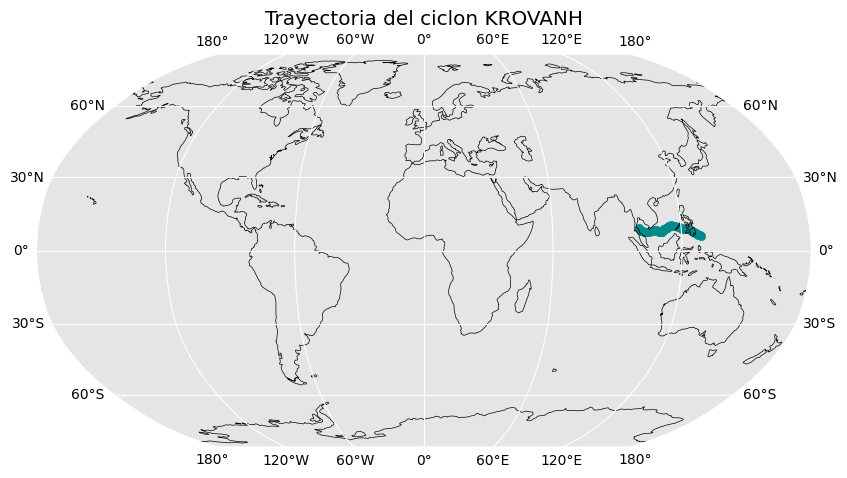

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()

# Agregar la trayectoria al mapa
ax.scatter(lon, lat, marker='o',color='darkcyan', transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title('Trayectoria del ciclon KROVANH')


In [ ]:
nor = ci[ci['NAME']== 'NORMA']
latn = nor['USA_LAT']
lonn = nor['USA_LON']

oti = ci[ci['NAME']== 'OTIS']
lato = oti['USA_LAT']
lono = oti['USA_LON']
lato

28643     8.10000
28644     8.10251
28645     8.10000
28646     8.09250
28647     8.10000
           ...   
28703    16.70000
28704    17.25760
28705    17.80000
28706    18.27250
28707    18.70000
Name: USA_LAT, Length: 65, dtype: float64

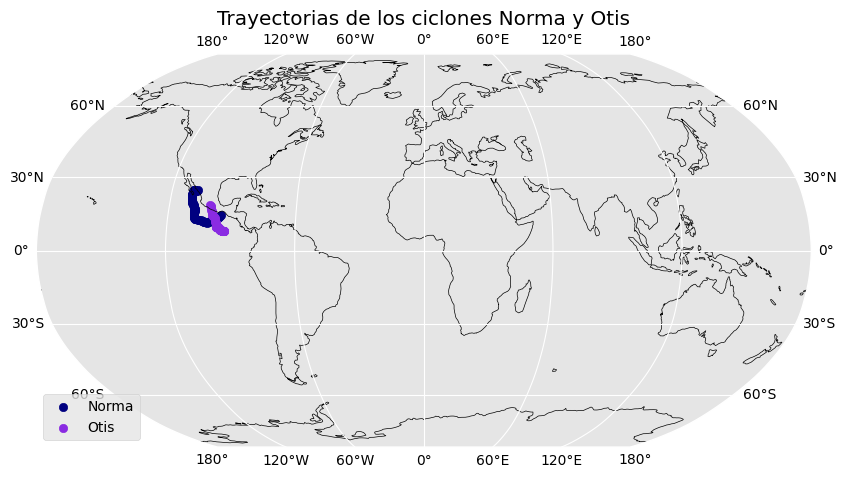

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()
names = ['Norma', 'Otis']
# Agregar la trayectoria al mapa
ax.scatter(lonn, latn, marker='o',color='navy', transform=ccrs.PlateCarree())
ax.scatter(lono, lato, marker='o',color='blueviolet', transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title('Trayectorias de los ciclones Norma y Otis')
plt.legend(names,loc='lower left')

# Ejercicio 5: Plantación de árboles

Utilizando la base de datos ["trees-with-species-and-dimensions-urban-forest"](https://drive.google.com/file/d/19i-6nwT53d0CPjDul0se9vvq7HQ7PDCO/view?usp=sharing) realicen lo siguiente:



1.   Crear un histograma de frecuencias que muestre el total de árboles plantados por año en la calle y en el parque, es decir que debe de haber dos barras por cada intervalo.
2.   Encontrar qué familias de árboles tuvieron entre 2,000 y 6,000 plantaciones totales, así como las familias que tuvieron entre 1,000 y 2,000 plantaciones totales. Escogan una familia de cada grupo y posteriormente hagan un gráfico de pastel en donde indiquen qué porcentaje fue plantado en parque y cuál en la calle, ambos gráficos deben de estar en una sola imagen.


In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
arb = pd.read_csv('trees-with-species-and-dimensions-urban-forest.csv')
arb
#._._._._._._._._._._._._._._._._._._._._._._._._

,com_id,common_name,scientific_name,genus,family,diameter_breast_height,year_planted,date_planted,age_description,useful_life_expectency,useful_life_expectency_value,precinct,located_in,uploaddate,coordinatelocation,latitude,longitude,easting,northing,geolocation
0,1029241,London Plane,Platanus x acerifolia,Platanus,Platanaceae,59.0,1997,1997-12-04,Mature,6-10 years (>50% canopy),10.0,NaN,Street,2021-01-10,"-37.834844802361296, 144.97624052189326",-37.834845,144.976241,321912.33,5810579.39,"-37.834844802361296, 144.97624052189326"
1,1357481,Cyprus Plane,Platanus orientalis,Platanus,Platanaceae,8.0,2008,2008-03-12,Juvenile,61+ years,80.0,NaN,Park,2021-01-10,"-37.82112379777012, 144.97204161951672",-37.821124,144.972042,321509.73,5812093.94,"-37.82112379777012, 144.97204161951672"
2,1022615,Spotted Gum,Corymbia maculata,Corymbia,Myrtaceae,73.0,1997,1997-11-10,Mature,31-60 years,60.0,NaN,Street,2021-01-10,"-37.800407968829234, 144.9624661325885",-37.800408,144.962466,320616.72,5814374.35,"-37.800407968829234, 144.9624661325885"
3,1584225,Mexican or Washington Palm,Washingtonia robusta,Washingtonia,Arecaceae,NaN,2015,2015-06-19,NaN,NaN,NaN,NaN,Street,2021-01-10,"-37.79745710207531, 144.94549656713158",-37.797457,144.945497,319115.37,5814669.08,"-37.79745710207531, 144.94549656713158"
4,1042546,Golden Wattle,Acacia pycnantha,Acacia,Fabaceae,NaN,1998,1998-11-20,NaN,NaN,NaN,NaN,Park,2021-01-10,"-37.79378928167871, 144.9536986384697",-37.793789,144.953699,319828.67,5815091.93,"-37.79378928167871, 144.9536986384697"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76923,1059977,Firewheel Tree,Stenocarpus sinuatus,Stenocarpus,Proteaceae,9.0,2000,2000-11-10,Juvenile,31-60 years,60.0,NaN,Street,2021-01-10,"-37.80474794597296, 144.95153710021376",-37.804748,144.951537,319664.99,5813871.72,"-37.80474794597296, 144.95153710021376"
76924,1057849,Chinese Elm,Ulmus parvifolia,Ulmus,Ulmaceae,22.0,1999,1999-06-22,Semi-Mature,21-30 years,30.0,NaN,Street,2021-01-10,"-37.78992930226043, 144.92259956413014",-37.789929,144.922600,317080.66,5815459.84,"-37.78992930226043, 144.92259956413014"
76925,1030906,London Plane,Platanus x acerifolia,Platanus,Platanaceae,43.0,1997,1997-12-12,Mature,21-30 years,30.0,NaN,Street,2021-01-10,"-37.82326502653145, 144.9212648665296",-37.823265,144.921265,317045.43,5811758.07,"-37.82326502653145, 144.9212648665296"
76926,1603539,Drooping sheoak,Allocasuarina verticillata,Allocasuarina,Casuarinaceae,NaN,2015,2015-08-26,NaN,NaN,NaN,NaN,Park,2021-01-10,"-37.787094225110096, 144.94107515446473",-37.787094,144.941075,318700.72,5815810.44,"-37.787094225110096, 144.94107515446473"


In [ ]:
years = arb['year_planted']
low = np.min(years)
max = np.max(years)
print(low)
print(max)

1899
2021


In [ ]:
arb2 = arb[['year_planted','located_in']]

st = arb2[arb2['located_in'] == 'Street']
par = arb2[arb2['located_in'] == 'Park']
st2 = st['year_planted']
par2 = par['year_planted']

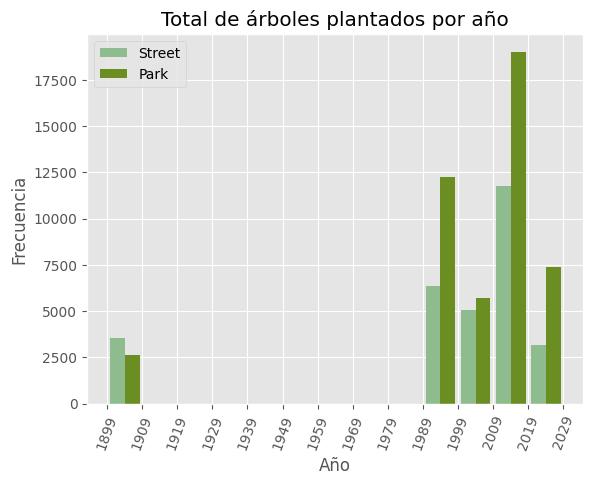

In [ ]:
import matplotlib.pyplot as plt

intervalos = [1899,1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019,2029]
sitio = ["Street", 'Park']

fig, ax = plt.subplots()
plt.hist(x = [st2, par2], bins = intervalos, color = ['darkseagreen' , 'olivedrab'], rwidth=0.85) ;#, cumulative = True
plt.title('Total de árboles plantados por año');
plt.xlabel('Año');
plt.ylabel('Frecuencia');
plt.xticks(intervalos,rotation=70);
plt.legend(sitio)

In [ ]:
#Ejercicio 2
arb3 = arb[['family','located_in']]
fam = arb3['family'].value_counts()
fam
arb3.index=arb3['family']
#2000-6000: Fagaceae  y Platanaceae
#1000-2000: Moraceae y Araucariaceae

In [ ]:
Fagp = len(arb3[(arb3['family'] == 'Fagaceae') & (arb3['located_in'] == 'Park')])
Fags = len(arb3[(arb3['family'] == 'Fagaceae') & (arb3['located_in'] == 'Street')])
Morp = len(arb3[(arb3['family'] == 'Moraceae') & (arb3['located_in'] == 'Park')])
Mors = len(arb3[(arb3['family'] == 'Moraceae') & (arb3['located_in'] == 'Street')])

In [ ]:
plantaciones = {
    'family': ['Fagaceae', 'Moraceae'],
    'Park': [Fagp, Morp],
    'Street': [Fags, Mors]
}
df = pd.DataFrame(plantaciones)
df.set_index('family', inplace = True)
df

,Park,Street
family,,
Fagaceae,1003,1341
Moraceae,964,675


          Park  Street
family                
Fagaceae  1003    1341
Moraceae   964     675


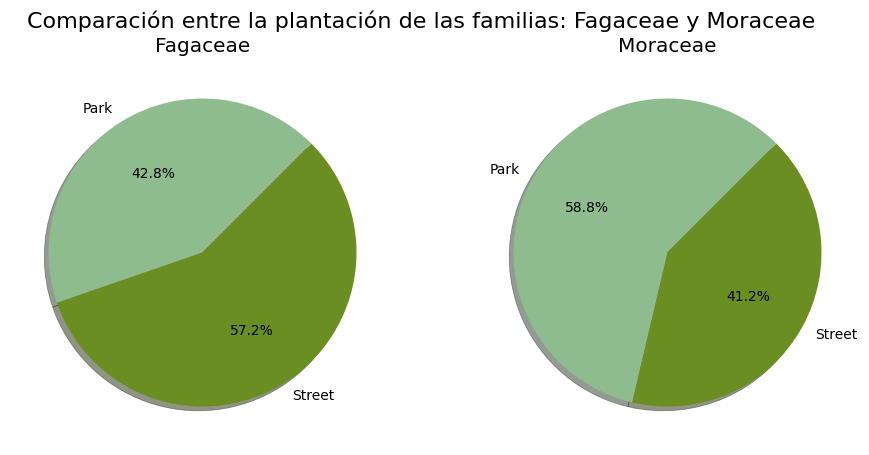

In [ ]:
colours = ['darkseagreen' , 'olivedrab']

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(11,5))
for ii, ax in enumerate(axs.flatten()):
  plt.sca(ax)
  plt.pie(df.iloc[ii], labels = df.columns, startangle = 45, colors = colours, autopct = '%1.1f%%', shadow = True);
  plt.title(df.index[ii])

plt.suptitle('Comparación entre la plantación de las familias: Fagaceae y Moraceae\n  ', fontsize=16)
print(df)


# Ejercicio 6: Impacto de Meteoritos

Utilizando la base de datos de ["Meteorite_Landings"](https://drive.google.com/file/d/1mDHHOc6OI52XO3bp9qgXMyM--xM3IorY/view?usp=sharing) deberán realizar un gráfico de caja con bigotes, para hacerlo hagan lo siguiente:



1.   Conviertan la masa de cada meteorito a kilogramos, posteriormente encuentren los cuartiles de esta variable.
2.   Encuentren los meteoritos que estén por debajo del primer cuartil, dentro del rango intercuartílico por arriba del tercer cuartil.
3. Ahora, ubiquen los años en donde hubo entre 40 y 60 impactos y escojan tres años por cada grupo.
4. En total tendrán 9 años, hagan un gráfico de caja con bigotes utilizando esos 9 años y la masa de los meteoritos de cada uno de esos años (recuerden que debe estar en kilogramos).

NOTA: la función `np.quantile()` así como `boxplot()` no funcionan si los datos que intentan utilizar tienen `NaN` por lo que tendrán que quitarlos si es que en sus datos aparecen.

In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#............................................

# Cargamos los datos
df = pd.read_csv('Meteorite_Landings.csv')

In [ ]:
# 6.1 Primero hay que deshacernos de los datos que tengan NaN
df_new = df['mass (g)'].dropna()

# Pasamos los gramos a kilogramos
kilos = df_new / 1000
kilos

# Sacamos los cuartiles
q = np.quantile(kilos, np.array([0.0,0.25, 0.50, 0.75,1.0]))
print(f'Cuartiles de la masa en kg de los meteoritos {q}')

#kilos.quantile([0.0,0.25, 0.50, 0.75,1.0])

Cuartiles de la masa en kg de los meteoritos [0.000e+00 7.200e-03 3.260e-02 2.026e-01 6.000e+04]


In [ ]:
#6.2 Hay que adjuntar nuestra columna de kilos a nuestro dataframe y quitar los NaN
df['mass (kg)'] = kilos
df2 = df['mass (kg)'].dropna()
df2

0          0.0210
1          0.7200
2        107.0000
3          1.9140
4          0.7800
           ...   
45711      0.1720
45712      0.0460
45713      0.0033
45714      2.1670
45715      0.2000
Name: mass (kg), Length: 45585, dtype: float64

In [ ]:
# A ese vector hay que agregarle las columnas faltantes del dataframe original
df3 = pd.DataFrame({'name': df['name'], 'mass (kg)': df2, 'year': df['year']})
df3

,name,mass (kg),year
0,Aachen,0.0210,1880.0
1,Aarhus,0.7200,1951.0
2,Abee,107.0000,1952.0
3,Acapulco,1.9140,1976.0
4,Achiras,0.7800,1902.0
...,...,...,...
45711,Zillah 002,0.1720,1990.0
45712,Zinder,0.0460,1999.0
45713,Zlin,0.0033,1939.0
45714,Zubkovsky,2.1670,2003.0


In [ ]:
# Sacamos los meteoritos que están por debajo del primer cuartil, dentro del rango intercuartílico y por arriba del tercer cuartil.
inter = df3.loc[(df3['mass (kg)'] >= 7.200e-03) & (df3['mass (kg)']<= 2.026e-01)]
min = df3.loc[df3['mass (kg)'] < 7.200e-03]
max = df3.loc[df3['mass (kg)'] > 2.026e-01]

# inter, min y max salen como un dataframe por aparte, por lo que se hicieron dataframes
# que ya involucre los años para después hacer el cuenteo de impactos
inter2 = inter[['name','year','mass (kg)']].reset_index()
inter2 = inter2.drop('index', axis=1)

min2 = min[['name','year','mass (kg)']].reset_index()
min2 = min2.drop('index', axis=1)

max2 = max[['name','year','mass (kg)']].reset_index()
max2 = max2.drop('index', axis=1)

print(inter2, min2, max2)

                     name    year  mass (kg)
0                  Aachen  1880.0     0.0210
1                 Al Rais  1957.0     0.1600
2                    Asco  1805.0     0.0410
3                Atemajac  1896.0     0.0942
4                  Avilez  1855.0     0.1460
...                   ...     ...        ...
22816  Zapotitlán Salinas  1984.0     0.0277
22817               Zerga  1973.0     0.0760
22818          Zillah 002  1990.0     0.1720
22819              Zinder  1999.0     0.0460
22820          Zulu Queen  1976.0     0.2000

[22821 rows x 3 columns]                   name    year  mass (kg)
0                Chail  1814.0     0.0005
1                Delhi  1897.0     0.0008
2            Hachi-oji  1817.0     0.0002
3              Kusiali  1860.0     0.0050
4                Natal  1973.0     0.0014
...                ...     ...        ...
11363      Yambo no. 2  1975.0     0.0032
11364  Yarle Lakes 004  2009.0     0.0046
11365      Yelland 001  2011.0     0.0045
11366        Y

In [ ]:
# 6.3 Primero hay que hacer el cuenteo de impactos de inter2, min2, y max2
impactos1 = inter2['year'].value_counts().reset_index()
impactos2 = min2['year'].value_counts().reset_index()
impactos3 = max2['year'].value_counts().reset_index()

print(impactos1, impactos2, impactos3)

       year  count
0    1998.0   1652
1    1988.0   1648
2    1979.0   1429
3    2003.0   1412
4    2006.0   1221
..      ...    ...
140  1939.0      1
141  1860.0      1
142  1829.0      1
143  1892.0      1
144  1929.0      1

[145 rows x 2 columns]       year  count
0   1979.0   1353
1   2003.0   1291
2   2006.0    763
3   1998.0    721
4   1986.0    684
..     ...    ...
63  1961.0      1
64  1830.0      1
65  1860.0      1
66  1817.0      1
67  1939.0      1

[68 rows x 2 columns]        year  count
0    2000.0    644
1    2003.0    620
2    2002.0    593
3    2001.0    588
4    2006.0    471
..      ...    ...
242  1740.0      1
243  1491.0      1
244  1399.0      1
245  1775.0      1
246  1792.0      1

[247 rows x 2 columns]


In [ ]:
# Ahora vamos a escoger los grupos que tuvieron entre 40 y 60 impactos y de cada grupo
# vamos a escoger 3 años para tener 9 años en total
meteoritos1 = impactos1[(impactos1['count'] >= 40) & (impactos1['count'] <= 60)]
meteoritos2 = impactos2[(impactos2['count'] >= 40) & (impactos2['count'] <= 60)]
meteoritos3 = impactos3[(impactos3['count'] >= 40) & (impactos3['count'] <= 60)]

print(meteoritos1)
print(meteoritos2)
print(meteoritos3)

# Bueno solo salieron 5 años lol

      year  count
37  1989.0     43
      year  count
32  2011.0     60
      year  count
35  1993.0     56
36  1937.0     52
37  1980.0     45
38  1976.0     43
39  1938.0     40


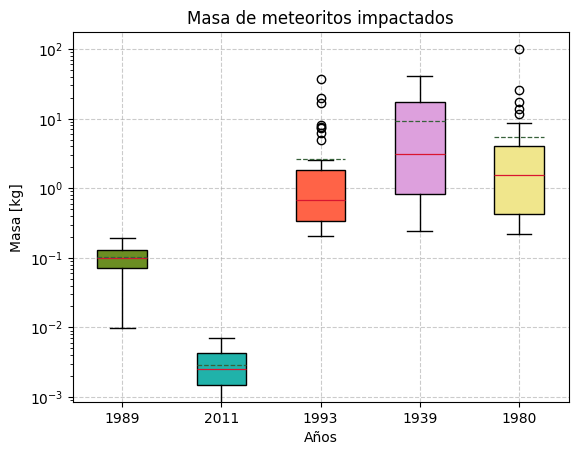

In [ ]:
# 6.4 Toca graficar
año1989 = inter2[inter2['year'] == 1989.0]['mass (kg)']
año2011 = min2[min2['year'] == 2011.0]['mass (kg)']
año1993 = max2[max2['year'] == 1993.0]['mass (kg)']
año1928 = max2[max2['year'] == 1928.0]['mass (kg)']
año1980 = max2[max2['year'] == 1980.0]['mass (kg)']

c = ['olivedrab', 'lightseagreen', 'tomato', 'plum', 'khaki']
labels = ['1989', '2011', '1993', '1939', '1980']
fig, ax = plt.subplots()
box  = plt.boxplot([año1989, año2011, año1993, año1928, año1980], showmeans = True, meanline = True, patch_artist= True,
                             meanprops = dict(color = "#37613a", linewidth = 0.9),
                             medianprops = dict(color = "#d91630", linewidth = 0.9),
                             labels = labels)
plt.title("Masa de meteoritos impactados")

ax.set_yscale('log') #IMPORTANTE PORQUE SINO SALEN TODAS APACHURRADAS
plt.grid(linestyle='--',alpha=0.66)

plt.ylabel('Masa [kg]', fontsize=10)
plt.xlabel('Años', fontsize=10)

for patch, color in zip(box['boxes'], c):
    patch.set_facecolor(color)

# Ejercicio 7: Ventas de videojuegos

Utilizando los datos del archivo ["Ventas+Videojuegos"](https://docs.google.com/spreadsheets/d/1WBWuCygFyxWEOi8HV_gkiRjWginuDrju/edit?usp=sharing&ouid=112817549404404455837&rtpof=true&sd=true) realicen lo siguiente.



1.   Realicen un gráfico de líneas en donde coloquen las ventas totales por año de cada una de las regiones ("Norteamérica", "Unión Europea", "Japón" y "Otros"). Es decir deben de haber 4 líneas.
2.   Tomen todos los datos desde 1995 - 2015 y encuentren a nivel **global** las 5 plataformas así como los 5 géneros que más han vendido en ese periodo de tiempo. Finalmente escogan el título favorito de cada uno de los integrantes de sus equipos y las ventas que tuvieron en las 4 regiones diferentes.
3. Con estos 3 sets de datos realicen tres gráficos de barras horizontales (es decir que las etiquetas deben estar en el eje Y) y deberán tener las siguientes características:


  *   Los gráficos con los top 5 plataformas y géneros deberán tener a estos en el eje Y y cada una de las barras deberá de ser la venta en cada una de las 4 regiones. El set con los juegos favoritos de cada uno de los integrantes deberá tener en el eje Y cada una de las regiones y las barras la venta de cada uno de los juegos

NOTA: Las ventas tienen unidades de millones.

NOTA 2: Tienen medio punto extra si averiguan los juegos favoritos de sus profes y los agregan.

NOTA 3: Tienen medio punto extra si ponen los tres gráficos en una sola imagen (como se ve en la figura de abajo), si no, preséntenlos por separado.

NOTA 4: Si los juegos que les gustan a sus compañeros salen en varias consolas, escojan una, la que ustedes gusten.


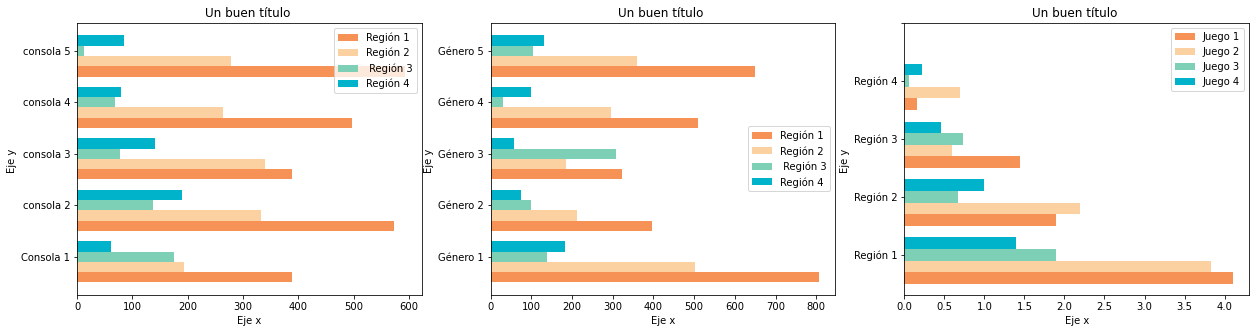

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
#Abrimos el archivo de videojuegos
videojuegos = pd.read_csv('Ventas+Videojuegos.xlsx - Ventas Videojuegos.csv')
videojuegos


,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16321,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16323,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [ ]:
#Realizamos una agrupación de las ventas de los videojuegos por años en Norteamérica, Estados Unidos, Japón y en otros países
NA= videojuegos.groupby(videojuegos.Año).sum()["Ventas NA"].reset_index()
EU= videojuegos.groupby(videojuegos.Año).sum()["Ventas EU"].reset_index()
JP= videojuegos.groupby(videojuegos.Año).sum()["Ventas JP"].reset_index()
Otro=videojuegos.groupby(videojuegos.Año).sum()["Ventas Otros"].reset_index()

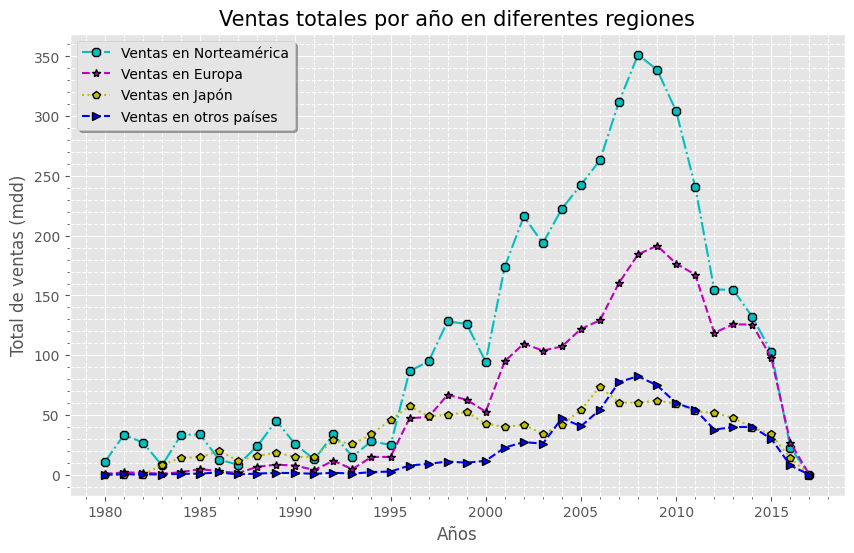

In [ ]:
#Graficamos estas ventas con un grafico de líneas
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(NA['Año'], NA['Ventas NA'], "8-.c",markeredgecolor='black')
plt.plot(NA['Año'], EU['Ventas EU'], "*--m",markeredgecolor='black')
plt.plot(NA['Año'], JP['Ventas JP'], "p:y", markeredgecolor='black')
plt.plot(NA['Año'], Otro['Ventas Otros'], ">--b", markeredgecolor='black')

# Chuleamos nuestra gráfica para que se vea bonita
plt.legend(["Ventas en Norteamérica", 'Ventas en Europa', 'Ventas en Japón', 'Ventas en otros países'],fancybox=True,shadow=True)
plt.title("Ventas totales por año en diferentes regiones", fontsize=15)
plt.xlabel("Años")
plt.ylabel("Total de ventas (mdd)")
plt.grid(linestyle='--', which="minor")
plt.minorticks_on()

In [ ]:
# Definimos los datos con respecto a los años de 1994-2016
jaños=videojuegos.loc[(videojuegos['Año']>1994)&(videojuegos['Año']<2016)]
#Calculamos las ventas totales de videojuegos para cada plataforma (jp=juego x plataforma)
jp= videojuegos.groupby(videojuegos.Plataforma).sum()["Ventas Global"].reset_index()
#Obtendremos los datos de ventas globales con respecto a jp, desde el videojuego con las ventas más altas hasta el videojuego con las ventas más bajas.
vg = jp.sort_values(by='Ventas Global', ascending=False)
# M= las 5 filas con las mayores ventas globales con respecto a las plataformas
M = vg.head(5)
print(M)

   Plataforma  Ventas Global
16        PS2        1233.46
28       X360         969.61
17        PS3         949.35
26        Wii         909.81
4          DS         818.67


In [ ]:
#pltf=plataforma
#Obtenemos las ventas de videojuegos en Norteamérica, Europa, Japón y otros países para las plataformas 'PS2', 'X360', 'PS3', 'Wii' y 'DS'.
pltf = videojuegos[videojuegos['Plataforma'].isin( ['PS2', 'X360', 'PS3', 'Wii', 'DS'])]
new_pltf = pltf[['Plataforma','Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros']]
#Sacamos la suma de las plataformas con relación con las ventas de cada país
ΣNA = new_pltf.groupby('Plataforma').agg({'Ventas NA': 'sum'}, ascending=True)
ΣEU = new_pltf.groupby('Plataforma').agg({'Ventas EU': 'sum'}, ascending=True)
ΣJP = new_pltf.groupby('Plataforma').agg({'Ventas JP': 'sum'}, ascending=True)
ΣO = new_pltf.groupby('Plataforma').agg({'Ventas Otros': 'sum'}, ascending=True)

paises = ['Ventas en Norteamérica', 'Ventas en Europa', 'Ventas en Japón', 'Ventas en otros países']
NA=[388.29, 572.92, 388.50, 497.37, 593.97]
EU=[194.07, 332.63, 339.67, 264.35, 277.61]
JP=[175.00, 137.55, 78.08, 68.28, 12.30]
Ots=[60.27, 190.47, 140.59, 79.20, 84.60]

In [ ]:
genero = videojuegos.groupby(videojuegos.Genero).sum()["Ventas Global"].reset_index()
genero
M2 = datin.head(5) #Top 5 de generos con su venta global
print(M2)

          Genero  Ventas Global
0         Action        1722.88
10        Sports        1309.24
8        Shooter        1026.20
7   Role-Playing         923.84
4       Platform         829.15


In [ ]:
#gM= top 5 anterior
gM = videojuegos[videojuegos['Genero'].isin( ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc'])]
new_g = gM[['Genero','Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros']]

sumgNA = new_g.groupby('Genero').agg({'Ventas NA': 'sum'}, ascending=True)
print(sumgNA)
sumgEU = new_g.groupby('Genero').agg({'Ventas EU': 'sum'}, ascending=True)
print(sumgEU)
sumgJP = new_g.groupby('Genero').agg({'Ventas JP': 'sum'}, ascending=True)
print(sumgJP)
sumgO =new_g.groupby('Genero').agg({'Ventas Otros': 'sum'}, ascending=True)
print(sumgO)

NAg=[806.87, 395.12, 322.62, 510.48, 649.39]
EUg=[502.48, 212.01, 186.13, 296.46, 360.00]
JPg=[139.18, 98.35, 308.40, 28.95, 103.36]
Og=[182.02, 73.74, 57.20, 98.21, 130.12]

              Ventas NA
Genero                 
Action           861.80
Misc             402.48
Role-Playing     326.50
Shooter          575.16
Sports           670.09
              Ventas EU
Genero                 
Action           516.48
Misc             213.82
Role-Playing     187.58
Shooter          310.45
Sports           371.34
              Ventas JP
Genero                 
Action           158.66
Misc             106.67
Role-Playing     350.29
Shooter           38.18
Sports           134.76
              Ventas Otros
Genero                    
Action              184.92
Misc                 74.02
Role-Playing         59.38
Shooter             101.90
Sports              132.65


In [ ]:
jgs = videojuegos[videojuegos['Nombre'].isin( ['Tetris', 'Call of Duty: Black Ops 3', 'Mario Kart 7', 'The Legend of Zelda: Skyward Sword', 'Just Dance'])]

J = jgs[jgs['Plataforma'].isin(['GB', 'WiiU', '3DS', 'N64', 'Wii'])]

new_J = J[['Nombre','Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros']]
print(new_J)

                                 Nombre  Ventas NA  Ventas EU  Ventas JP  \
5                                Tetris      23.20       2.26       4.22   
42                         Mario Kart 7       4.74       3.91       2.67   
102                          Just Dance       3.51       3.03       0.00   
285  The Legend of Zelda: Skyward Sword       2.14       1.20       0.37   

     Ventas Otros  
5            0.58  
42           0.89  
102          0.73  
285          0.40  


In [ ]:
juegos = ['Tetris', 'Call of Duty: Black Ops 3', 'Mario Kart 7', 'The Legend of Zelda: Skyward Sword', 'Just Dance']
chofis=[2.91, 1.86, 3.14, 0.43]
jorge=[4.10 , 1.89, 1.45 , 0.16]
ana=[4.52, 2.09, 0.01, 0.67]
mine=[3.13, 1.20, 0.37, 0.49]
cupich= [2.14, 1.20, 0.37, 0.40]

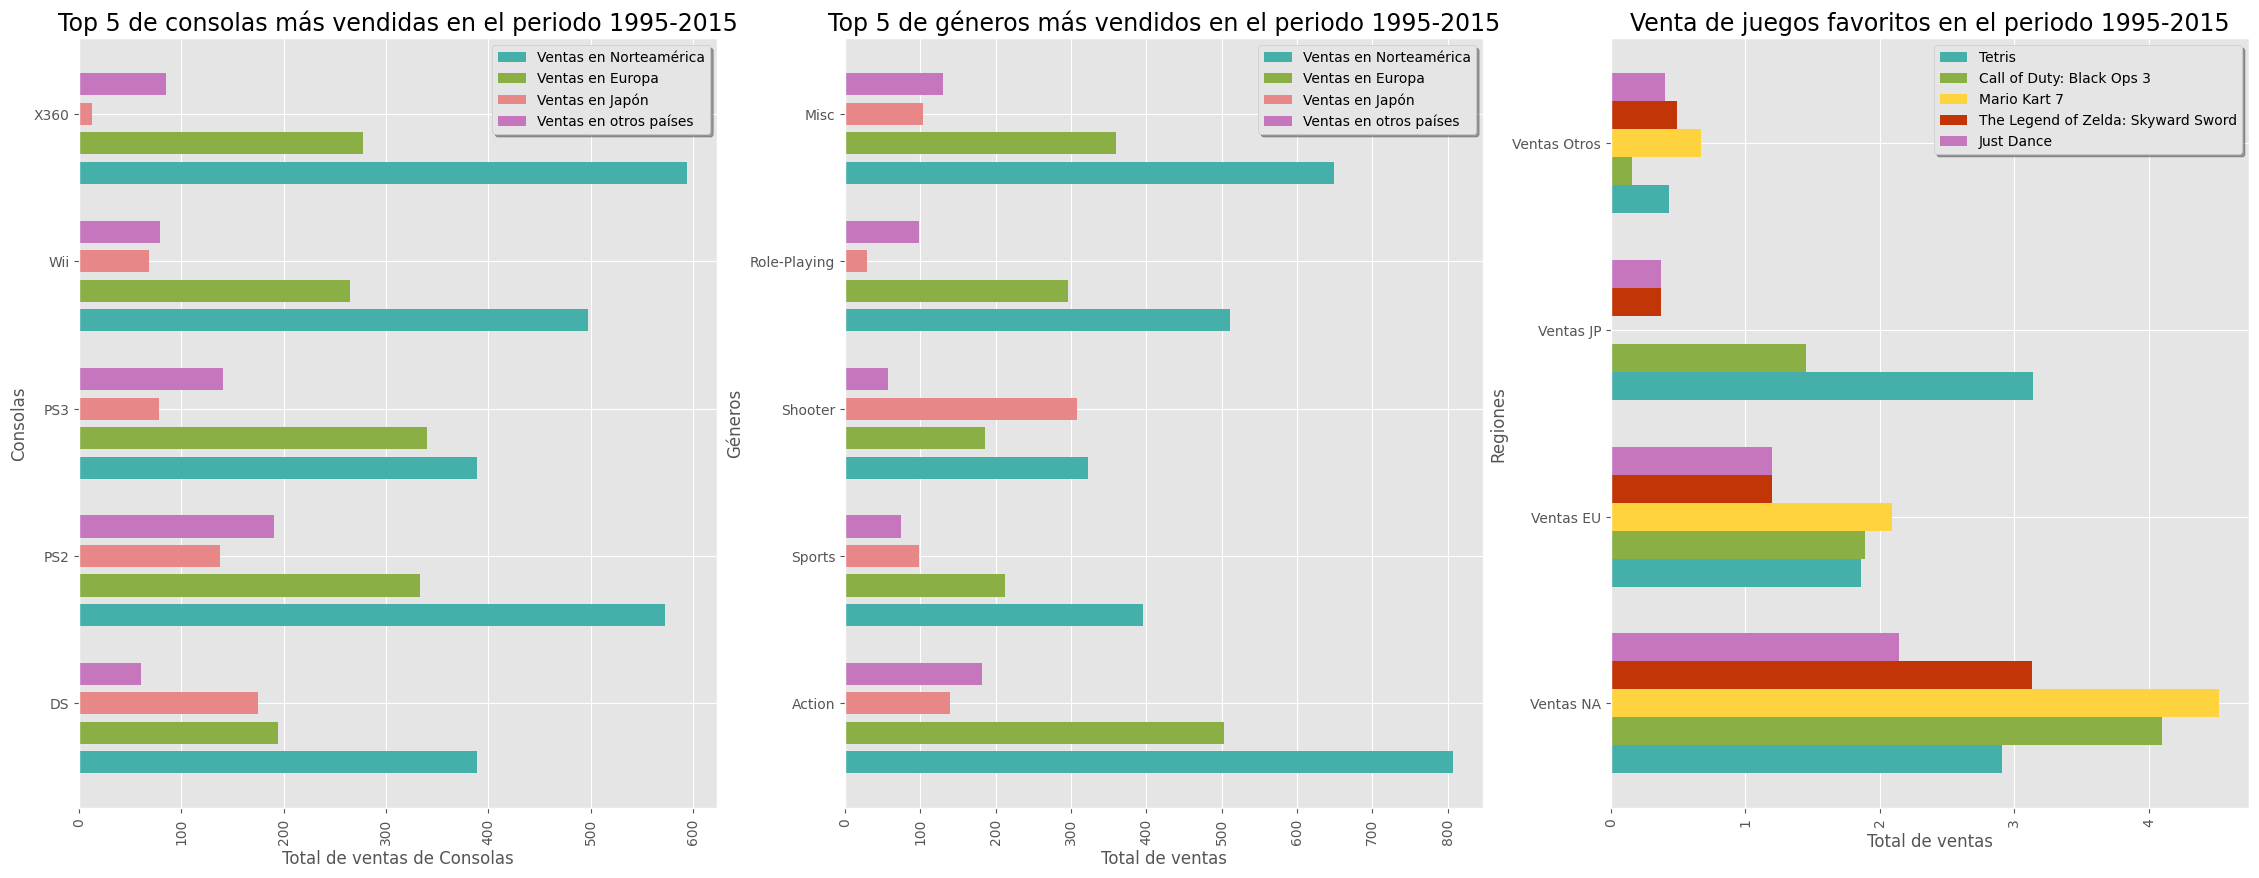

In [ ]:
paisesf = ['Ventas en Norteamérica', 'Ventas en Europa', 'Ventas en Japón', 'Ventas en otros países']

fig, ax = plt.subplots(1, 3, figsize=(28, 10))

y = np.arange(5)
ax[0].barh(y-0.4, NA, width,color ='#45AFAA')
ax[0].barh(y-0.2, EU, width, color ='#8AAF45')
ax[0].barh(y, JP, width, color ='#E78787')
ax[0].barh(y+0.2, Ots, width, color ='#C576BC')

ax[0].set_xlabel("Total de ventas de Consolas", fontsize=12)
ax[0].set_yticks(y, ['DS', 'PS2', 'PS3', 'Wii', 'X360'])
ax[0].set_ylabel('Consolas', fontsize=12)
ax[0].legend(paises, fancybox=True, shadow=True)
ax[0].set_title("Top 5 de consolas más vendidas en el periodo 1995-2015", fontsize=17)
ax[0].grid(linestyle='--', which="minor")
ax[0].tick_params(axis='x', rotation=90)


y = np.arange(5)
ax[1].barh(y-0.4, NAg, width,color ='#45AFAA')
ax[1].barh(y-0.2, EUg, width, color ='#8AAF45')
ax[1].barh(y, JPg, width, color ='#E78787')
ax[1].barh(y+0.2, Og, width, color ='#C576BC')

ax[1].set_xlabel("Total de ventas", fontsize=12)
ax[1].set_yticks(y, ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc'])
ax[1].set_ylabel('Géneros', fontsize=12)
ax[1].legend(paises, fancybox=True,shadow=True)
ax[1].set_title("Top 5 de géneros más vendidos en el periodo 1995-2015", fontsize=17)
ax[1].grid(linestyle='--', which="minor")
ax[1].tick_params(axis='x', rotation=90)

y = np.arange(4)
ax[2].barh(y-0.3, chofis, width,color ='#45AFAA')
ax[2].barh(y-0.15, jorge, width, color ='#8AAF45')
ax[2].barh(y, ana, width, color ='#FFD33D')
ax[2].barh(y+0.15, mine, width, color ='#C23506')
ax[2].barh(y+0.3, cupich, width, color ='#C576BC')

ax[2].set_xlabel("Total de ventas", fontsize=12)
ax[2].set_yticks(y, ['Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros'])
ax[2].set_ylabel('Regiones', fontsize=12)
ax[2].legend(juegos, fancybox=True,shadow=True)
ax[2].set_title("Venta de juegos favoritos en el periodo 1995-2015", fontsize=17)
ax[2].grid(linestyle='--', which="minor")
ax[2].tick_params(axis='x', rotation=90)



# Ejercicio 8 El Niño y La Niña.

Considere la base de datos de HadSST desde 1970 hasta 2023.

1. Investigue cuáles fueron los 5 eventos de El Niño y los 5 eventos de La Niña más fuertes.
2. Haga un slice sobre la base de datos para seleccionar los periodos correspondientes a estos 10 eventos.
3. Seleccione los datos correspondientes a los meses de Nov, Dic, Ene, Feb y Mar para cada evento.
4. Promedie, en el tiempo, los datos correspondientes a todos los eventos considerados como El Niño.
5. Promedie, en el tiempo, los datos correspondientes a todos los eventos considerados como La Niña.
6. Haga un mapa de dos paneles graficando las anomalías promedio de los eventos de El Niño y la Niña.

Extra** 5 puntos. Modifique sus mapas de la siguiente manera:

1. Muestre el mapa sólo en la región indicada.
2. Muestre sólo las etiquetas las coordenadas en el eje izquierdo e inferior.
3. Agregue una "label" a su colorbar como se muestra en la imagen.

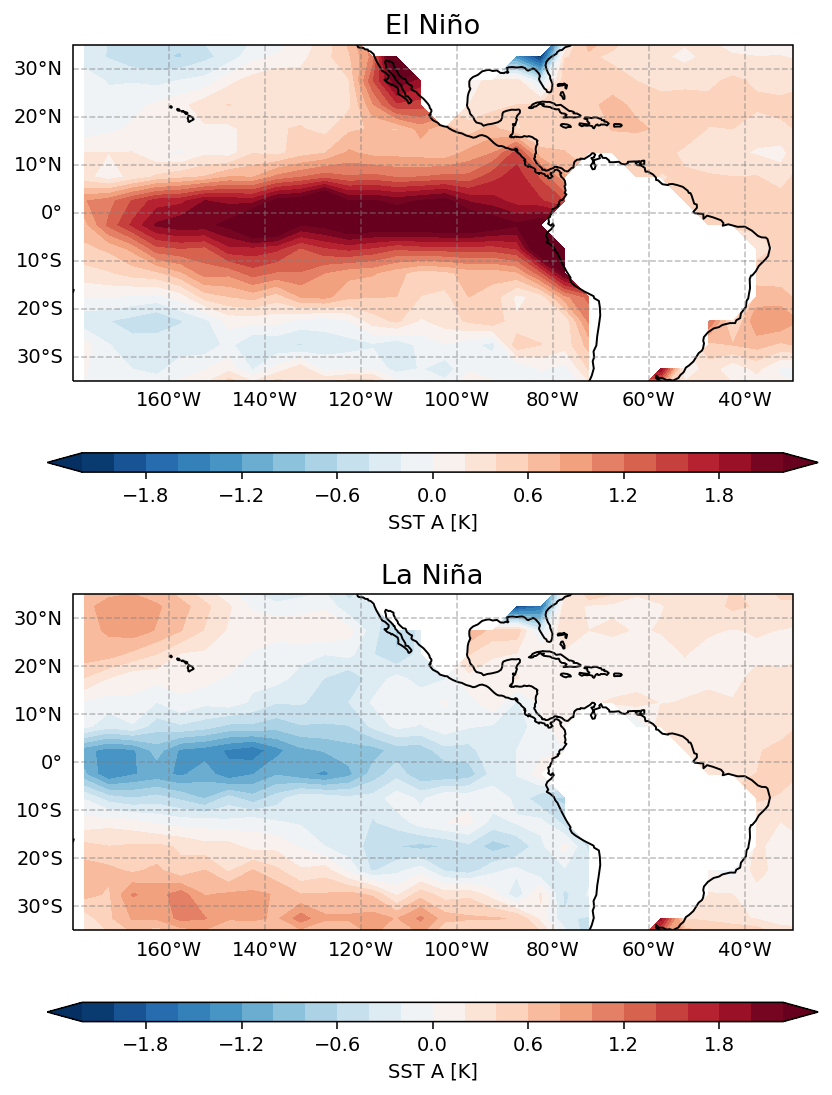

In [ ]:
pip install  h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install cartopy

  Using cached Cartopy-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
# abrimos el dataset
ds=xr.open_dataset('HadSST.4.0.1.0_median.nc')
ds

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 2090, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-0...
  * latitude        (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 576B -177.5 -172.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tos             (time, latitude, longitude) float32 22MB ...
    time_bnds       (time, bnds) datetime64[ns] 33kB ...
    latitude_bnds   (latitude, bnds) float64 576B ...
    longitude_bnds  (longitude, bnds) float64 1kB ...
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7

In [ ]:
promedio_temporal=ds['tos'].mean('time')
print(promedio_temporal)
lats=ds.latitude
lons=ds.longitude
tos=ds['tos']

<xarray.DataArray 'tos' (latitude: 36, longitude: 72)> Size: 10kB
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.24348556, -0.08268671, -0.12877007, ...,  0.12850012,
         0.1077027 , -0.17581147],
       ...,
       [ 1.5398502 ,  1.5136441 ,  1.5625608 , ...,         nan,
         1.8324167 ,  2.1468048 ],
       [ 1.9920365 ,         nan,         nan, ...,  1.4948993 ,
         1.5016713 ,  1.8706833 ],
       [        nan,         nan,         nan, ...,  1.9172359 ,
                nan,         nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float64 576B -177.5 -172.5 -167.5 ... 172.5 177.5


In [ ]:
# 8.2 Hacemos un slice que abarque el intervalo de años de los eventos
niño = tos.time.dt.year[slice(1982, 2016)]
niño
niña = tos.time.dt.year[slice(1916, 2012)]
niña

<xarray.DataArray 'year' (time: 96)> Size: 768B
array([2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017])
Coordinates:
  * time     (time) datetime64[ns] 768B 2009-09-16 ... 2017-08-16T12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    long_name:      time

In [ ]:
# 8.3 Seleccionamos datos de Nov-Mar en variables diferentes, porque sino toma esos meses del mismo año
nov =tos[(tos.time.dt.month>=11)]
mar = tos[(tos.time.dt.month<=3)]

In [ ]:
# 8.4 y 8.5 Promediamos en el tiempo nuestros slices
niño_mean = niño.mean("time")
niño_mean
niña_mean = niña.mean("time")
niña_mean

<xarray.DataArray 'year' ()> Size: 8B
array(2013.16666667)

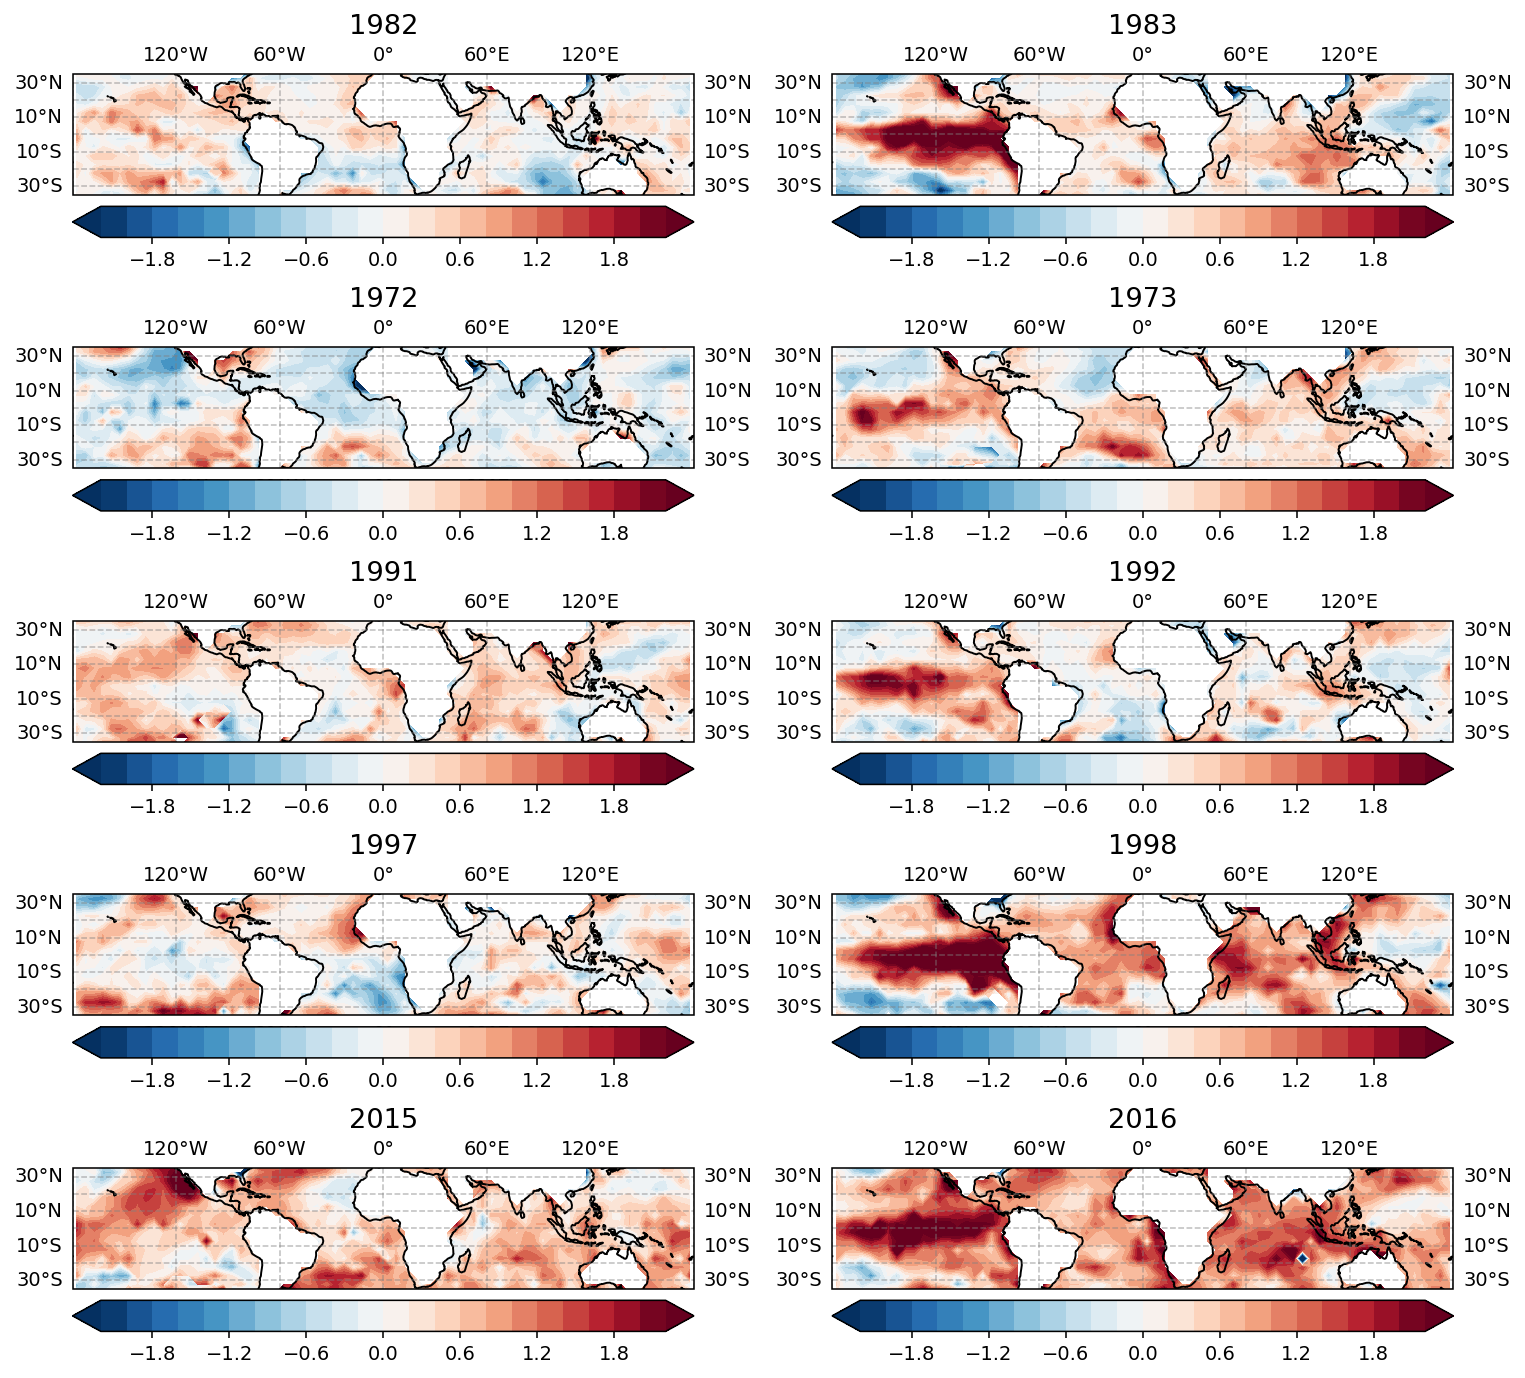

In [ ]:
# 8.6 Eventos del niño
niño_list = [1982, 1983, 1972,1973, 1991, 1992, 1997, 1998, 2015, 2016]

fig = plt.figure(figsize=(11,10),dpi=140)
for iy,year in enumerate(niño_list):
    # seleccion de los datos de cada año correspondiente
    year1_data=nov[(nov.time.dt.year==year)]
    year2_data=mar[(mar.time.dt.year==year)]
    # promedio temporal
    year1_data=year1_data.mean('time')
    year2_data=year2_data.mean('time')
    # generamos la figura del mapa
    ax = fig.add_subplot(5, 2, 1+iy, projection=ccrs.PlateCarree())
    # definimos el extent
    ax.set_extent([80,300, -35, 35], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')

    ax.coastlines()
    cs1=ax.contourf(lons,lats,year1_data,levels=np.arange(-2.2,2.21,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both')
    cs2=ax.contourf(lons,lats,year2_data,levels=np.arange(-2.2,2.21,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both')
    # el titulo es el string del año
    plt.title(str(year),fontsize=14)

    # Agregamos una barra de color debajo de cada panel
    #plt.colorbar(cs1, ax=ax, orientation='horizontal', pad=0.05)
    plt.colorbar(cs2, ax=ax, orientation='horizontal', pad=0.05)

plt.tight_layout() #sirve para compactar bien los panales y se guarden bonito en png
plt.show()

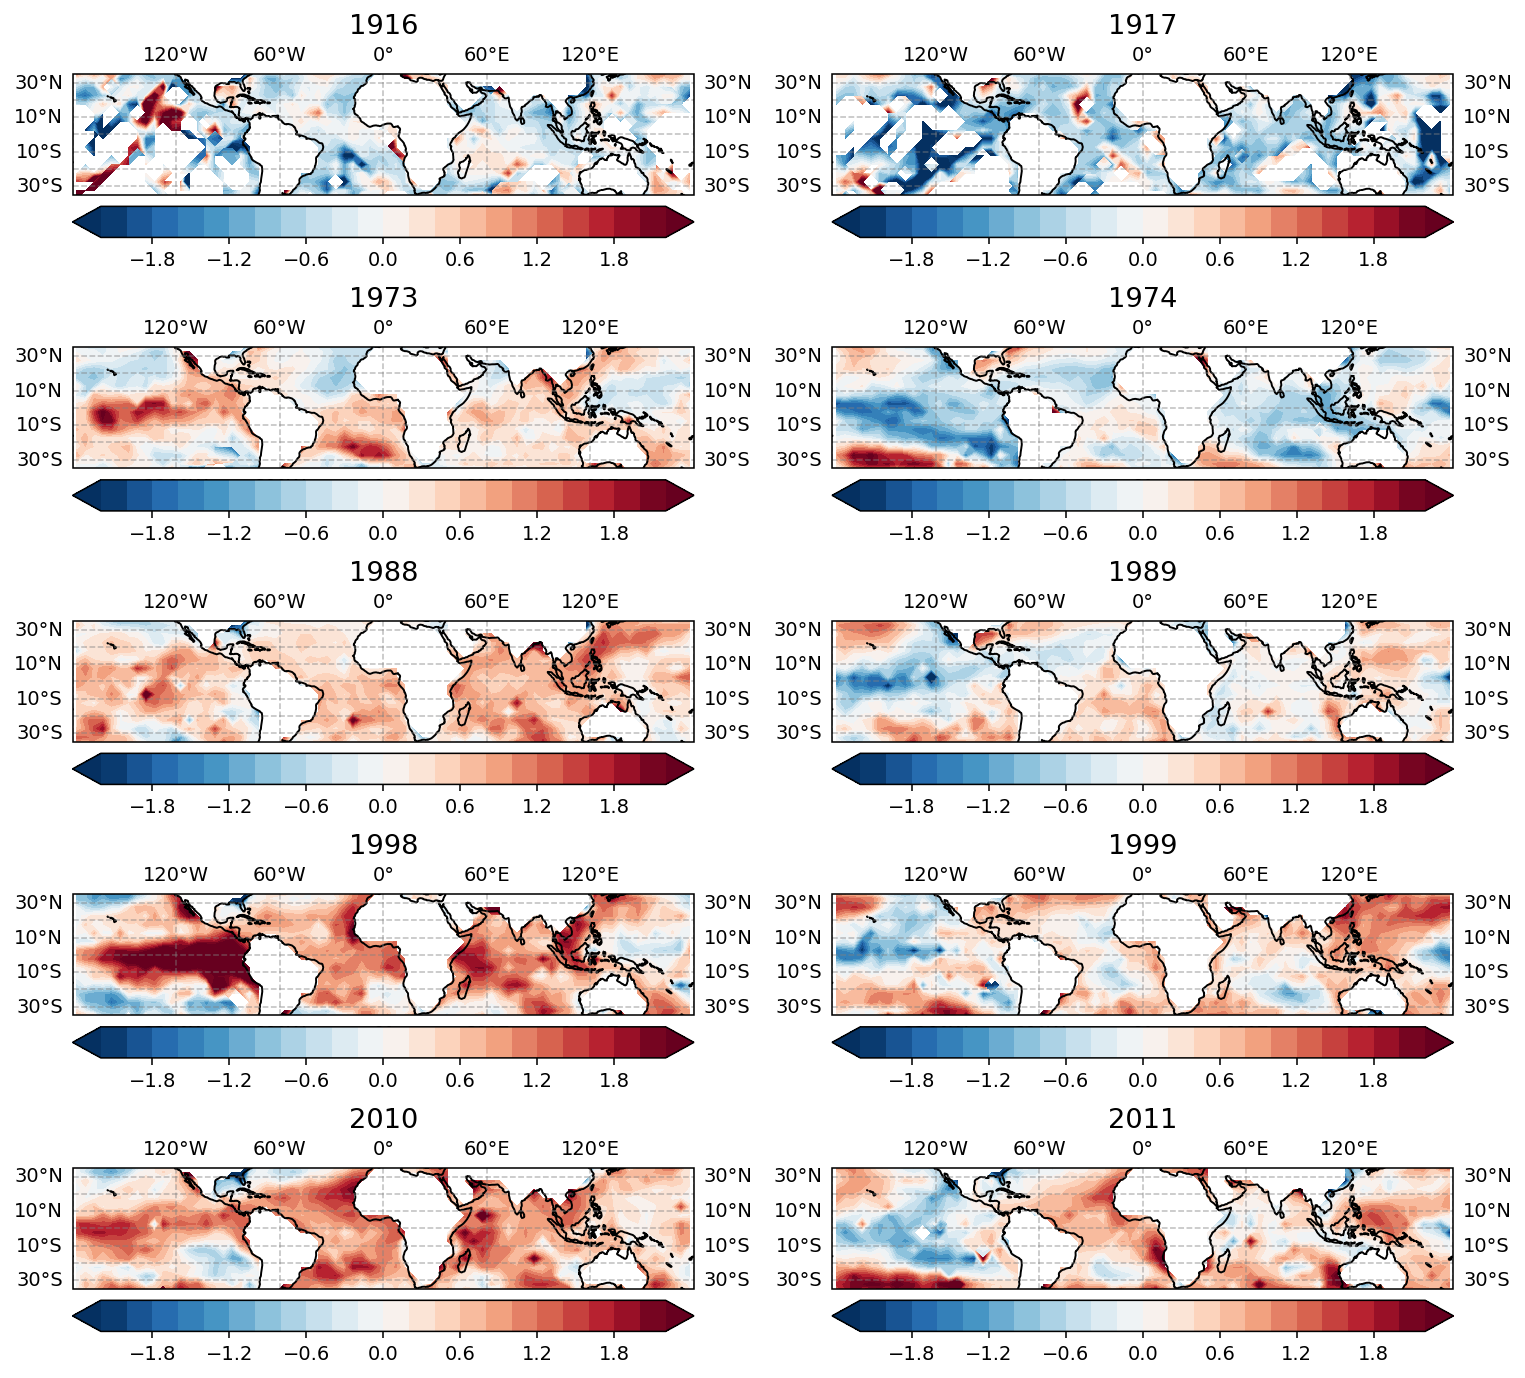

In [ ]:
# 8.6 Eventos de la niña
niña_list = [1916, 1917, 1973,1974, 1988, 1989, 1998, 1999 , 2010, 2011]

fig = plt.figure(figsize=(11,10),dpi=140)
for iy,year in enumerate(niña_list):
    # seleccion de los datos de cada año correspondiente
    year1_data=nov[(nov.time.dt.year==year)]
    year2_data=mar[(mar.time.dt.year==year)]
    # promedio temporal
    year1_data=year1_data.mean('time')
    year2_data=year2_data.mean('time')
    # generamos la figura del mapa
    ax = fig.add_subplot(5, 2, 1+iy, projection=ccrs.PlateCarree())
    # definimos el extent
    ax.set_extent([80,300, -35, 35], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')

    ax.coastlines()
    cs1=ax.contourf(lons,lats,year1_data,levels=np.arange(-2.2,2.21,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both')
    cs2=ax.contourf(lons,lats,year2_data,levels=np.arange(-2.2,2.21,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both')
    # el titulo es el string del año
    plt.title(str(year),fontsize=14)

    # Agregamos una barra de color debajo de cada panel
    #plt.colorbar(cs1, ax=ax, orientation='horizontal', pad=0.05)
    plt.colorbar(cs2, ax=ax, orientation='horizontal', pad=0.05)

plt.tight_layout() #sirve para compactar bien los panales y se guarden bonito en png
plt.show()

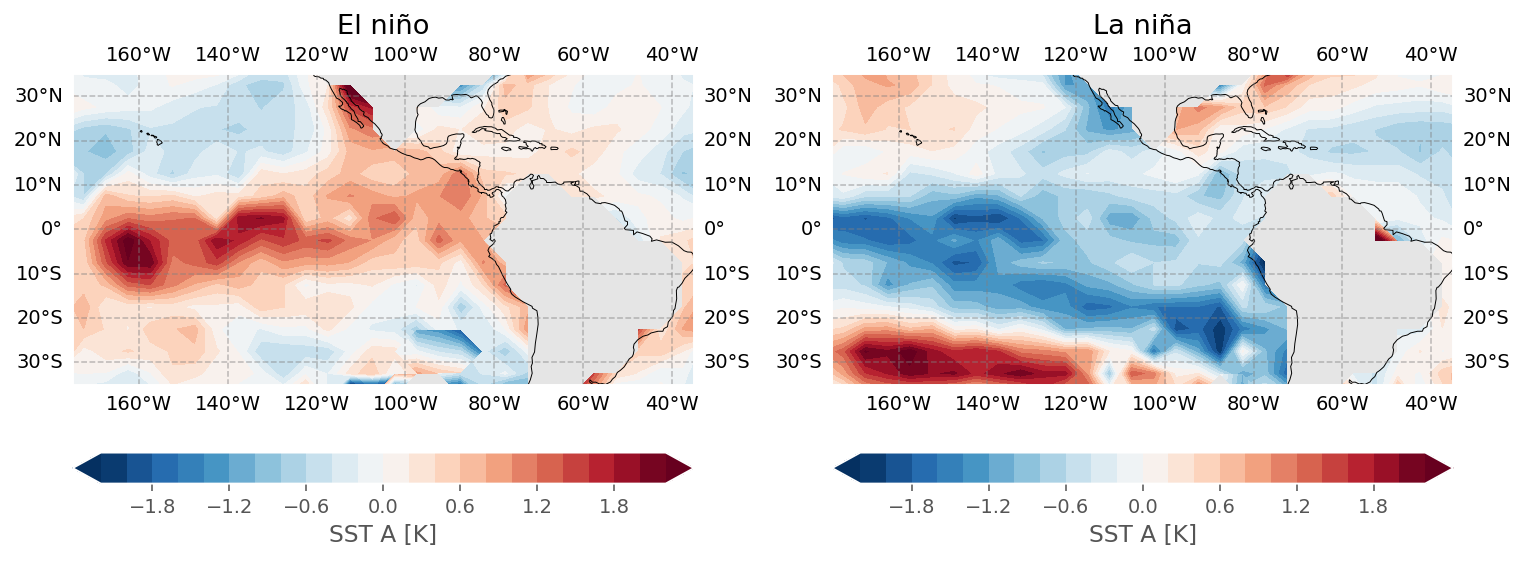

In [ ]:
# Ejercicio extra
# Solo no hallé como modificar las etiquetas de los ejes izquierdo e inferior :(
niñes_list = [1973, 1974]

fig = plt.figure(figsize=(11,10),dpi=140)
for iy,year in enumerate(niñes_list):
    # seleccion de los datos de cada año correspondiente
    year1_data=nov[(nov.time.dt.year==year)]
    year2_data=mar[(mar.time.dt.year==year)]
    # promedio temporal
    year1_data=year1_data.mean('time')
    year2_data=year2_data.mean('time')
    # generamos la figura del mapa
    ax = fig.add_subplot(1, 2, 1+iy, projection=ccrs.PlateCarree())
    # definimos el extent
    ax.set_extent([185,325, -35, 35], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')

    # Eliminar ticks en la parte superior y a la derecha (spoiler: no se quitan)
    ax.top_labels=False
    ax.right_labels = False

    ax.coastlines()
    cs1=ax.contourf(lons,lats,year1_data,levels=np.arange(-2.2,2.21,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both')
    cs2=ax.contourf(lons,lats,year2_data,levels=np.arange(-2.2,2.21,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both')

    # el titulo es "El niño" para el primer panel y "La niña" para el segundo panel
    if iy == 0:
        plt.title("El niño", fontsize=14)
    else:
        plt.title("La niña", fontsize=14)

    # Agregamos una barra de color debajo de cada panel
    #plt.colorbar(cs1, ax=ax, orientation='horizontal', pad=0.05)
    c = plt.colorbar(cs2, ax=ax, orientation='horizontal', pad=0.05)
    c.set_label('SST A [K]')  # Ajusta la etiqueta del colorbar


plt.tight_layout() #sirve para compactar bien los panales y se guarden bonito en png
plt.show()